In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D
import requests
import pandas as pd
import matplotlib.pyplot as plt

### Se usaron 5 tablas de datos para el ejercicio:
#### Tasa de muerte: Número anual promedio de muertes por cada 1000 habitantes
#### Médicos: Densidad de médicos por cada 1000 habitantes.
#### Camas de hospital: Densidad de camas de hospital por cada 1000 habitantes
#### Esperanza de vida: Años promedio que vive un habitante.
#### Pobreza: Porcentaje de la población debajo de la linea de pobreza. Hay que tomar en cuenta que cada país define su propia linea.
##### Solo se tomaron en cuenta los paises de América que contaban con los últimos 5 cinco registros.

In [2]:
tab=[]
df = []
fix=["26","2226","2227","30","69"]
fix2 = ["s","n","c"]
u = "https://www.indexmundi.com/map/?t=0&v="
u2 = "&r="
u3 = "a&l=en"
for i in range(5):
    for j in range(3):
        aux = u,fix[i],u2,fix2[j],u3
        url = "".join(aux)
        html = requests.get(url).content                                  
        df_list = pd.read_html(html)                                      
        df.append(df_list[1])
    tab.append(pd.concat([df[0],df[1],df[2]], ignore_index=True))
    df=[]
    tab[i] = tab[i].sort_values("Country", ascending = True)

In [3]:
tabla = tab[0]
for i in range(1,5):
    tabla = pd.merge(tabla,tab[i], on = "Country",how="inner")
tabla = pd.DataFrame({'Pais':tabla["Country"], 'Tasa de muerte':tabla["Death rate (deaths/1,000 population)"],
                     'Medicos':tabla["Physicians density (physicians/1,000 population)"],
                     'Camas_de_Hospital':tabla["Hospital bed density (beds/1,000 population)"],
                     'Esperanza_de_Vida':tabla["Life expectancy at birth (years)"],
                     'Pobreza':tabla["Population below poverty line (%)"]})
aux = tabla.sort_values("Esperanza_de_Vida", ascending = False)

## Tabla a usar

In [4]:
aux

,Pais,Tasa de muerte,Medicos,Camas_de_Hospital,Esperanza_de_Vida,Pobreza
5,Canada,9,3,3,82,9
27,United States,8,3,3,80,15
8,Costa Rica,5,1,1,79,22
22,Panama,5,2,2,79,23
6,Chile,6,1,2,79,14
0,Argentina,8,4,5,78,26
23,Paraguay,5,1,1,78,22
28,Uruguay,9,5,3,78,10
9,Dominica,8,1,4,77,29
11,Ecuador,5,2,2,77,22


## 1- ¿La esperanza de vida es mayor en los países menos pobres de américa?

In [5]:
aux = tabla.sort_values("Esperanza_de_Vida", ascending = True)
aux2 = tabla.sort_values("Pobreza", ascending = False)
promEV = tabla["Esperanza_de_Vida"].mean()

#### Tomemos los 8 paises que están notoriamente más arriba del promedio de Esperanza de Vida que es de 75 años. En orden: Canada, USA, Panama, Chile, Costa Rica, Uruguay, Argentina y Paraguay, y veámos el lugar que ocupan en pobreza. 

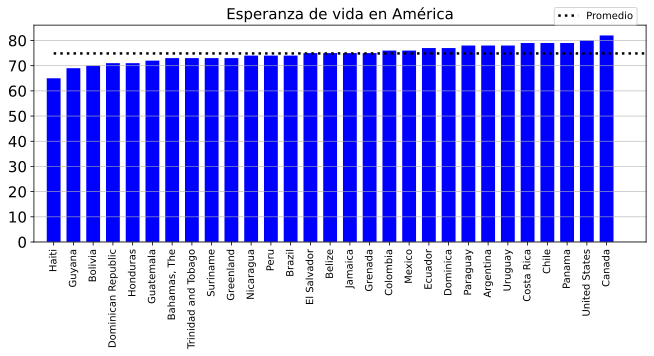

In [6]:
plt.figure(figsize=[11,4])
plt.bar(aux["Pais"], aux["Esperanza_de_Vida"] , width = 0.7, color='blue',alpha=1)
plt.plot([0,38],[promEV,promEV], linestyle = 'dotted',linewidth=2.5, color='black', label="Promedio")
plt.legend(bbox_to_anchor=(0.85, 1.0), loc='lower left', borderaxespad=0.)
plt.xlim(-1, 30)
plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value',fontsize=15)
#plt.ylabel('Es',fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.yticks(fontsize=15)
plt.title('Esperanza de vida en América',fontsize=15)
plt.show()

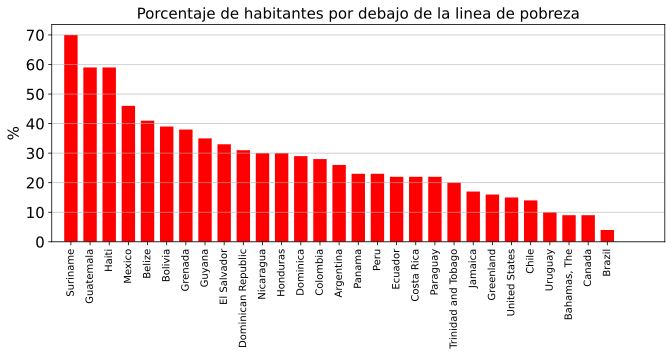

In [7]:
#tamaño de la grafica
plt.figure(figsize=[11,4])
plt.bar(aux2["Pais"], aux2["Pobreza"] , width = 0.7, color='red', alpha=1)
#plt.xlim permite indicar el tamaño de la grafica por disponibilidad de coordenadas
plt.xlim(-1, 31)
#modifica la cuadricula o en este caso las lineas en eje y de toda la grafica
plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value',fontsize=15)
plt.ylabel('%',fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.yticks(fontsize=15)
plt.title('Porcentaje de habitantes por debajo de la linea de pobreza',fontsize=15)
plt.show()

In [8]:
nom = {"Canada": 1, "United States": 2, "Panama": 3, "Chile":4, "Costa Rica":5, "Uruguay":6, "Argentina":7, "Paraguay": 8}
lg = [2,6,14,5,11,4,15,10]
tab2 = pd.Series(nom)
tab2 = pd.DataFrame({'Lugar en Esperanza de vida':tab2, 'Lugar en menor porcentaje de Pobreza':lg})
tab2

,Lugar en Esperanza de vida,Lugar en menor porcentaje de Pobreza
Canada,1,2
United States,2,6
Panama,3,14
Chile,4,5
Costa Rica,5,11
Uruguay,6,4
Argentina,7,15
Paraguay,8,10


### Podemos observar que 5 de los 8 paises con mejor esperanza de vida están entre los 10 paises con menor porcentaje de pobreza, mientras que los 3 restantes están entre los primeros quince. Por lo tanto es claro que existe una relación entre estas dos variables.

## 2- ¿Hay escasez de Hospitales en América?

### Podemos hacer una relación entre la densidad de camas de hospital y la densidad de médicos por país para ver si existe escasez de hospitales en América.

In [9]:
aux3 = tabla.sort_values("Camas_de_Hospital", ascending = True)
promc = tabla["Camas_de_Hospital"].mean()
promm = tabla["Medicos"].mean()

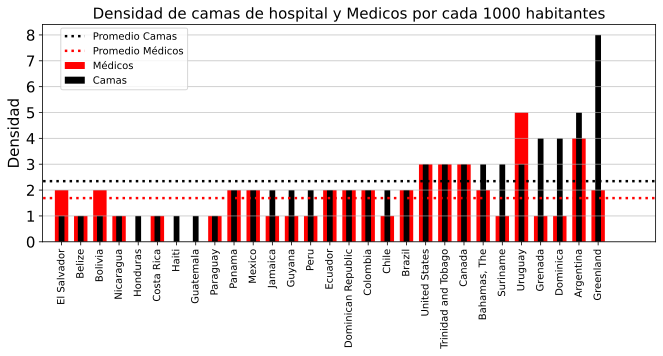

In [10]:
plt.figure(figsize=[11,4])
plt.bar(aux3["Pais"], aux3["Medicos"] , width = 0.7, color='red',alpha=1, label = "Médicos")
plt.bar(aux3["Pais"], aux3["Camas_de_Hospital"] , width = 0.3, color='black',alpha=1, label= "Camas")
plt.plot([-2,38],[promc,promc], linestyle = 'dotted',linewidth=2.5, color='black', label="Promedio Camas")
plt.plot([-2,38],[promm,promm], linestyle = 'dotted',linewidth=2.5, color='red', label="Promedio Médicos")
plt.legend(bbox_to_anchor=(0.03, 0.7), loc='lower left', borderaxespad=0.)
plt.xlim(-1, 31)
plt.grid(axis='y', alpha=0.75)
#plt.xlabel('Value',fontsize=15)
plt.ylabel('Densidad',fontsize=15)
plt.xticks(fontsize=10, rotation='vertical')
plt.yticks(fontsize=15)
plt.title('Densidad de camas de hospital y Medicos por cada 1000 habitantes',fontsize=15)
plt.show()


### Ya que el número de camas de hospital nos da información directa sobre el número de hospitales, podemos observar en el gráfico anterior que el promedio de densidad de camas en América supera por poco el promedio de densidad de médicos. Aunque es preocupante que en promedio haya menos de dos médicos por cada mil habitantes en América y poco más de dos camas de hospital, lo que deducimos que aunque existen suficientes médicos para atender a las camas de hospital sin problema, hay escacez de hospitales en América y se puede llegar a resentir bastante en una crisis sanitaria.

## 3- ¿Cuál región de América (sur, norte, centro) tienen una menor tasa de mortalidad?
### Dividiremos el continente en sus tres zonas y compararemos los promedios de tasa de mortalidad

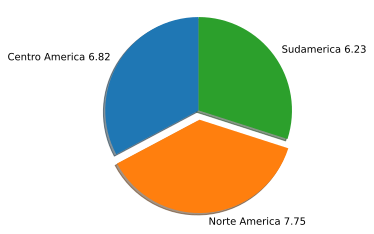

In [11]:
url = "https://www.indexmundi.com/map/?t=0&v=26&r=sa&l=en"
html = requests.get(url).content                                  
df_list = pd.read_html(html)                                      
dfsa = df_list[1]
url = "https://www.indexmundi.com/map/?t=0&v=26&r=na&l=en"
html = requests.get(url).content                                  
df_list = pd.read_html(html)                                      
dfna = df_list[1]
url = "https://www.indexmundi.com/map/?t=0&v=26&r=ca&l=en"
html = requests.get(url).content                                  
df_list = pd.read_html(html)                                      
dfca = df_list[1]
pca = dfca["Death rate (deaths/1,000 population)"].mean()
pna = dfna["Death rate (deaths/1,000 population)"].mean()
psa = dfsa["Death rate (deaths/1,000 population)"].mean()

aux4 = ['Centro America 6.82', 'Norte America 7.75', 'Sudamerica 6.23']
aux5 = [pca, pna , psa]
explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(aux5, labels=aux4, explode=explode, shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### En la gráfica de pay anterior se muestra las proporciones entre los promedios de tasa de muerte entre las secciones de América y sus valores, Podemos deducir que la tasa de muerte más alta la tiene Norte América, seguido de Centro América.

## 4- ¿Es más pobre la zona centro de América que la zona sur?

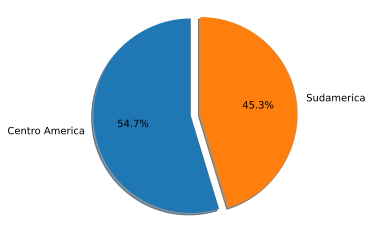

In [12]:
url = "https://www.indexmundi.com/map/?t=0&v=69&r=sa&l=en"
html = requests.get(url).content                                  
df_list = pd.read_html(html)                                      
dfsa = df_list[1]
url = "https://www.indexmundi.com/map/?t=0&v=69&r=ca&l=en"
html = requests.get(url).content                                  
df_list = pd.read_html(html)                                      
dfca = df_list[1]
pca = dfca["Population below poverty line (%)"].mean()
psa = dfsa["Population below poverty line (%)"].mean()

aux4 = ['Centro America', 'Sudamerica']
aux5 = [pca, psa]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(aux5, labels=aux4, explode=explode, shadow=True, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

### La gráfica anterior muestra que el 54% de las personas debajo de la linea de pobreza se encuentran en Centro América, por lo tanto se puede llegar a deducir que existe más porcentaje de pobreza en Centro América que en Sudamérica.

## 5-¿Qué países tienen una tasa de densidad de médicos menor de 2.3?

Indicamos los valores menores a 2.3 de densidad de doctores

In [13]:
uno=aux[(aux['Esperanza_de_Vida'].ge(72))]

In [14]:
uno=uno.sort_values(by=['Pais'], ignore_index=True)

In [15]:
dos=aux[(aux['Medicos'].le(2.3))]
dos=dos.sort_values(by=['Pais'], ignore_index=True)
dos

,Pais,Tasa de muerte,Medicos,Camas_de_Hospital,Esperanza_de_Vida,Pobreza
0,"Bahamas, The",7,2,3,73,9
1,Belize,4,1,1,75,41
2,Bolivia,6,2,1,70,39
3,Brazil,7,2,2,74,4
4,Chile,6,1,2,79,14
5,Colombia,6,2,2,76,28
6,Costa Rica,5,1,1,79,22
7,Dominica,8,1,4,77,29
8,Dominican Republic,6,2,2,71,31
9,Ecuador,5,2,2,77,22


In [16]:
aux[(aux['Medicos'].ge(2.3))]

,Pais,Tasa de muerte,Medicos,Camas_de_Hospital,Esperanza_de_Vida,Pobreza
26,Trinidad and Tobago,9,3,3,73,20
0,Argentina,8,4,5,78,26
28,Uruguay,9,5,3,78,10
27,United States,8,3,3,80,15
5,Canada,9,3,3,82,9


In [17]:
dos.describe()

,Tasa de muerte,Medicos,Camas_de_Hospital,Esperanza_de_Vida,Pobreza
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6.166667,1.291667,2.125000,74.166667,30.833333
std,1.307725,0.690253,1.541104,3.409280,15.955554
min,4.000000,0.000000,1.000000,65.000000,4.000000
25%,5.000000,1.000000,1.000000,72.750000,22.000000
50%,6.000000,1.000000,2.000000,74.500000,29.500000
75%,7.000000,2.000000,2.000000,76.250000,38.250000
max,9.000000,2.000000,8.000000,79.000000,70.000000


In [18]:
seis=aux[(aux['Medicos'].ge(2.3))]
seis

,Pais,Tasa de muerte,Medicos,Camas_de_Hospital,Esperanza_de_Vida,Pobreza
26,Trinidad and Tobago,9,3,3,73,20
0,Argentina,8,4,5,78,26
28,Uruguay,9,5,3,78,10
27,United States,8,3,3,80,15
5,Canada,9,3,3,82,9


In [19]:
# cu son los paises que coinciden con tener densidad de medicos menor de 2.3 y tener esperanza de vida mayor a 72 años que es el promedio mundial
cu = pd.merge(uno, dos)

In [20]:
cu.count()

Pais                 19
Tasa de muerte       19
Medicos              19
Camas_de_Hospital    19
Esperanza_de_Vida    19
Pobreza              19
dtype: int64

Text(0.5, 1.0, 'Porcentaje de países con densidad de medicos (DM) y esperanza de vida (EV) ')

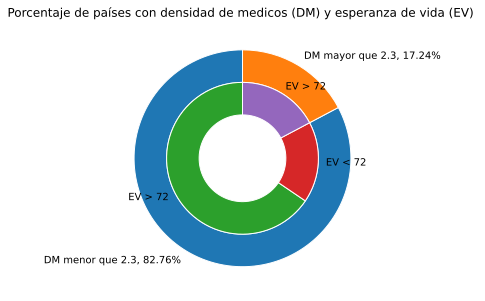

In [21]:

explode= (0, 0.1)
plt.figure(figsize=[12,5])
#cmap = plt.get_cmap("tab20c")
#outer_colors = cmap(np.arange(3)*4)
#inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
size=0.3
plt.pie(x=[24,5], labels=['DM menor que 2.3, 82.76%', 'DM mayor que 2.3, 17.24%'], startangle=90, radius=1, wedgeprops=dict(width=size, edgecolor='w'))
plt.pie(x=[19,5, 5], labels=['EV > 72', 'EV < 72', 'EV > 72'], startangle=90, radius=1-size, wedgeprops=dict(width=size, edgecolor='w'))
plt.title('Porcentaje de países con densidad de medicos (DM) y esperanza de vida (EV) ')

## 6-¿Qué países cuentan con menores cantidades de densidad de camas y pobreza? 

In [22]:
aux.columns

Index(['Pais', 'Tasa de muerte', 'Medicos', 'Camas_de_Hospital',
       'Esperanza_de_Vida', 'Pobreza'],
      dtype='object')

In [23]:
tres=aux.nsmallest(10, ['Camas_de_Hospital']) 

In [24]:
tres=tres.sort_values(by=['Pais'], ignore_index=True)

In [25]:
cuatro=aux.nsmallest(10, ['Pobreza']) 

In [26]:
cuatro=cuatro.sort_values(by=['Pais'], ignore_index=True)

In [27]:
# pu son los paises que coinciden con tener menor densidad de cama y menor densidad de pobreza
pu=pd.merge(tres, cuatro)
pu

,Pais,Tasa de muerte,Medicos,Camas_de_Hospital,Esperanza_de_Vida,Pobreza


In [28]:
pu.index

Index([], dtype='object')

#### Ningun país cumple el requisito de tener pocas camas de hospital y tener niveles de pobreza bajos

## 7-Reformulando la pregunta a ¿Que países cuentan con menor densidad de camas y con mayor pobreza?

In [29]:
cinco=aux.nlargest(10, ['Pobreza']) 

In [30]:
# mu contiene a los paises con menor densidad de camas y mayor pobreza
mu=pd.merge(cinco, tres)
mu

,Pais,Tasa de muerte,Medicos,Camas_de_Hospital,Esperanza_de_Vida,Pobreza
0,Haiti,8,0,1,65,59
1,Guatemala,5,0,1,72,59
2,Belize,4,1,1,75,41
3,Bolivia,6,2,1,70,39
4,Guyana,7,1,2,69,35
5,El Salvador,6,2,1,75,33


In [31]:
#El porcentaje correspondiente es
(mu.Pais.count()*aux.Pais.count())*0.01

1.74

## 8-¿Cómo es la tasa de mortalidad de America respecto al promedio mundial?

Considerando el promedio mundial del 2018 es de 7.7, se compara con la esperanza de vida de los países de América

In [32]:
aux[aux['Tasa de muerte'].le(7.7)].count()

Pais                 19
Tasa de muerte       19
Medicos              19
Camas_de_Hospital    19
Esperanza_de_Vida    19
Pobreza              19
dtype: int64

Text(0.5, 1.0, 'Porcentaje de países con tasa de mortalidad comparada con promedio mundial 7.7 en 2018')

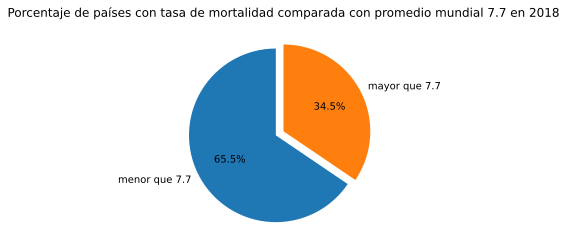

In [33]:
plt.figure
explode= (0.1, 0)

plt.pie(x=[19,10], labels=['menor que 7.7', 'mayor que 7.7'], autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Porcentaje de países con tasa de mortalidad comparada con promedio mundial 7.7 en 2018')

## 9- ¿Qué porcentaje de países están por encima del promedio mundial? Respecto a la esperanza de vida

In [34]:
#La esperanza de vida promedio en América es:
ev=aux['Esperanza_de_Vida'].mean()
ev

74.86206896551724

In [35]:
#Aqui cuento los paises que estan por encima del promedio
aux[aux['Esperanza_de_Vida'].ge(ev)].count()

Pais                 16
Tasa de muerte       16
Medicos              16
Camas_de_Hospital    16
Esperanza_de_Vida    16
Pobreza              16
dtype: int64

Text(0.5, 1.0, 'Porcentaje de países con tasa de natalidad comparada con promedio continental en 2018')

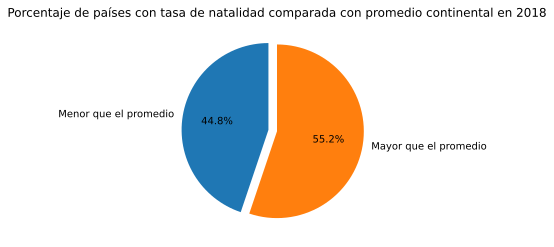

In [36]:
plt.figure
explode= (0.1, 0)

plt.pie(x=[13,16], labels=['Menor que el promedio', 'Mayor que el promedio'], autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Porcentaje de países con tasa de natalidad comparada con promedio continental en 2018')